<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Parcial1_SyS_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### **PARCIAL #1 SEÑALES Y SISTEMAS - 2025 2S**
#### **Estudiante:** Valeria Corredor García
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

---

In [1]:
#Importar librerías
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

---

**1.** La distancia media entre dos señales periódicas $x_1(t) \in \mathbb{R}, \mathbb{C}$ y $x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

<div align="center">

$d^2(x_1, x_2) = \overline{P}_{(x_1 - x_2)} = \lim_{T\to\infty} \frac{1}{T} \int_{T} \left| x_{1}(t) - x_{2}(t) \right|^{2} \, dt$

</div>

Sean $x_1(t)$ y $x_2(t)$ definidas como:

<div align="center">

$
\begin{aligned}
x_{1}(t) &= A e^{-\mathrm{j} n \omega_{0} t} &\qquad& \omega_{0}=\frac{2\pi}{\tau},\ \ \tau,A,B\in\mathbb{R}^{+},\ \ n,m\in\mathbb{Z} \\
x_{2}(t) &= B e^{\mathrm{j} m \omega_{0} t} &&
\end{aligned}
$

</div>

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

In [2]:
#Variables
t = sp.symbols('t') #Variable independiente

#Parámetros
A,B= sp.symbols('A,B', real=True, positive=True)
n,m= sp.symbols('n,m', integer=True) #multiplos enteros de w0
T= sp.symbols('T', real=True, positive=True)
w0= 2*sp.pi/T

#Señales
x1= A*sp.exp(-sp.I*n*w0*t)
x2= B*sp.exp(sp.I*m*w0*t)

#Cálculo de la distancia media
d= sp.sqrt(sp.Limit((1/T)*sp.integrate(sp.Abs(x1-x2)**2, (t,0,T)),T,sp.oo))
#Mostrar resultado simplificado
d.simplify()

Piecewise((sqrt(A**2 + B**2), Ne(m, -n)), (sqrt(A**2 - 2*A*B + B**2), True))

---

**2.** Encuentre la señal en tiempo discreto al utilizar un conversor análogo a digital con frecuencia de muestreo de $5 kHz$ y $4 bits$ de capacidad de representación aplicado a la señal continua:

<div align="center">

$x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)$

</div>

Realizar la simulación del proceso de discretización de al menos tres periodos de $x(t)$. En caso de que la discretización no sea apropiada, diseñe e implemete un conversor adecuado para la señal estudiada.

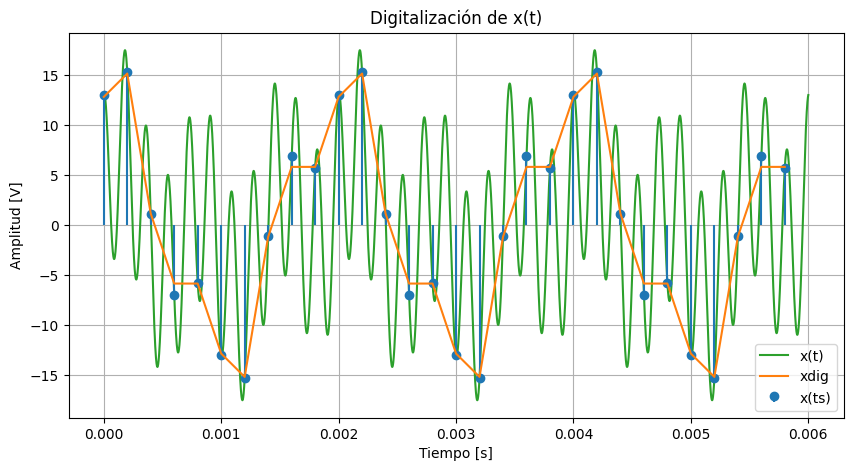

In [3]:
#Parámetros
Fs= 5000          #Frecuencia de muestreo [Hz]
Ts= 1/Fs          #Periodo de muestreo [s]

#Tiempos
T=1/500                       #Periodo fundamental [s]
tf= 3* T                      #tiempo final (al menos 3 periodos) [s]
t= np.linspace(0, tf, 30000 ) #tiempo continuo [s]
ts= np.arange(0, tf, Ts)      #tiempo dicreto [s]

#Definición de x(t) (suma de tres señales periodicas)
xt= 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

#Discretización
xts= 3*np.cos(1000*np.pi*ts) + 5*np.sin(3000*np.pi*ts) + 10*np.cos(11000*np.pi*ts)

#Cuantización
n= 2**4 #numero de estados
levels= np.linspace(min(xt),max(xt), n )        #cantidad de niveles
distance= np.abs(xts[:, None]- levels[None, :]) #distancia de xts a cada nivel
ind= np.argmin(distance, axis=1)                #indice del nivel más cercano

#Señal digitalizada
xdig= levels[ind] #vector de niveles que contiene el vector de indices

#Visualización
plt.figure(figsize=(10,5))                                  #tamaño
plt.title("Digitalización de x(t)")                         #titulo
plt.plot(t, xt, label='x(t)', color='C2', linewidth=1.5)    #señal continua
plt.stem(ts, xts, label='x(ts)', basefmt=" ")               #señal discreta
plt.plot(ts, xdig, label='xdig', color='C1', linewidth=1.5) #señal digital
plt.xlabel('Tiempo [s]')                                    #label eje x
plt.ylabel('Amplitud [V]')                                  #label eje y
plt.grid(True)                                              #grilla
plt.legend()                                                #leyenda



Como es posible observar en la anterior simulación, la discretitación no es la apropiada según el Teorema de Nyquist, el cual establece que una señal de banda limitada con una frecuencia máxima ( Fmax )
puede ser reconstruida completamente a partir de sus muestras si la frecuencia de muestreo ( Fs)
satisface la siguiente condición:

$$ Fs \geq 2Fmax $$

Lo cual no se cumple en el ejercicio anterior, generando de tal manera efectos no deseados en la señal tales como el aliasing. Con el fin de solucionar este problema se plantea la siguiente solución:

dado que la frecuencia máxima de la señal corresponde a 11000Hz, para que se cumpla el Teorema de Nyquist, es necesario que la frecuencia de muestreo (Fs) sea como minimo:  
\begin{equation}
2 \times 5500\,\text{Hz} = 11000\,\text{Hz}
\end{equation}




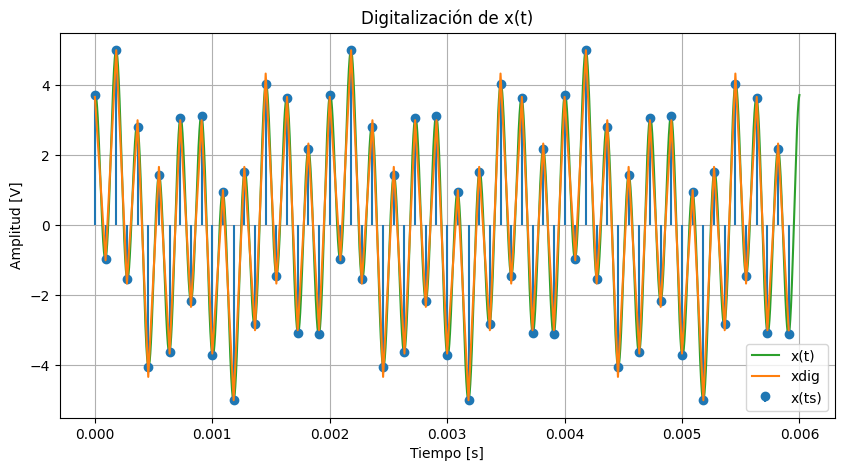

In [4]:
#Representación entre -5V y 5V
def my_ceropen(x, ymin=-5, ymax=5):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin) / (xmax - xmin)
  c = ymin - m * xmin
  y = m *x + c
  return y

#Parámetros
Fs= 11000    #Frecuencia de muestreo adecuada[Hz]
Ts= 1/Fs     #Periodo de muestreo [s]

#Tiempos
T=1/500                       #Periodo fundamental [s]
tf= 3* T                      #tiempo final (al menos 3 periodos) [s]
t= np.linspace(0, tf, 30000 ) #tiempo continuo [s]
ts= np.arange(0, tf, Ts)      #tiempo dicreto [s]

#Definición de x(t) (suma de tres señales periodicas)
xt= 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)
xt = my_ceropen(xt)

#Discretización
xts= 3*np.cos(1000*np.pi*ts) + 5*np.sin(3000*np.pi*ts) + 10*np.cos(11000*np.pi*ts)
xts = my_ceropen(xts)

#Cuantización
n= 2**4 #numero de estados
levels= np.linspace(min(xt),max(xt), n )        #cantidad de niveles
distance= np.abs(xts[:, None]- levels[None, :]) #distancia de xts a cada nivel
ind= np.argmin(distance, axis=1)                #indice del nivel más cercano

#Señal digitalizada
xdig= levels[ind] #vector de niveles que contiene el vector de indices

#Visualización
plt.figure(figsize=(10,5))                                  #tamaño
plt.title("Digitalización de x(t)")                         #titulo
plt.plot(t, xt, label='x(t)', color='C2', linewidth=1.5)    #señal continua
plt.stem(ts, xts, label='x(ts)', basefmt=" ")               #señal discreta
plt.plot(ts, xdig, label='xdig', color='C1', linewidth=1.5) #señal digital
plt.xlabel('Tiempo [s]')                                    #label eje x
plt.ylabel('Amplitud [V]')                                  #label eje y
plt.grid(True)                                              #grilla
plt.legend()                                                #leyenda

**3.** Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

<div align="center">

$c_n = \frac{1}{(t_{i}-t_{f})n^2\omega_0^2} \int_{t_i}^{t_f} x''(t)\, e^{-j n \omega_0 t}\, dt, \qquad n \in \mathbb{Z}$

</div>

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

---

**4.** Encuentre el espectro de Fourier, su parte real e imaginaria, magnitud, fase y el error relativo de la estimación para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$ a partir de $x''(t)$ para la señal $x(t)$ . Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente la simulaciones de Python respectivas.

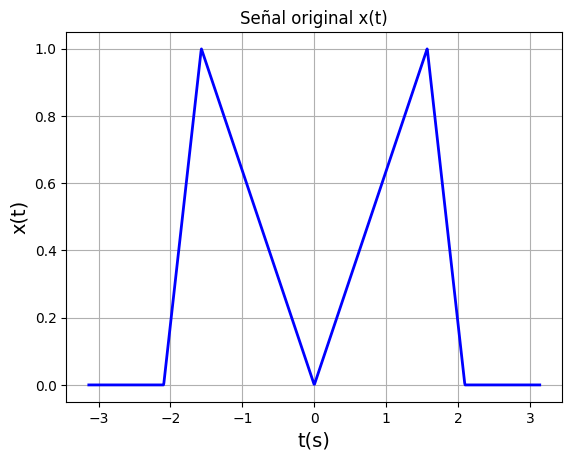

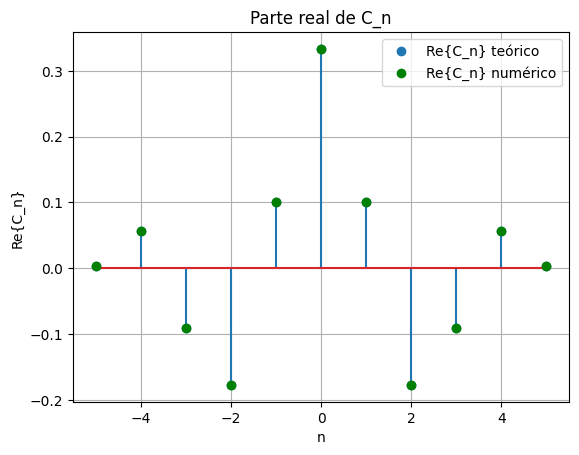

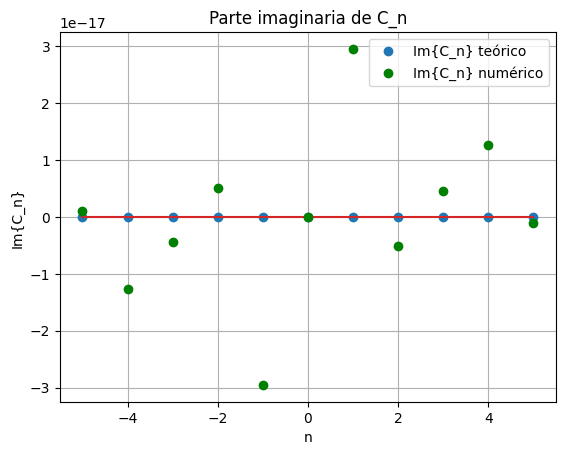

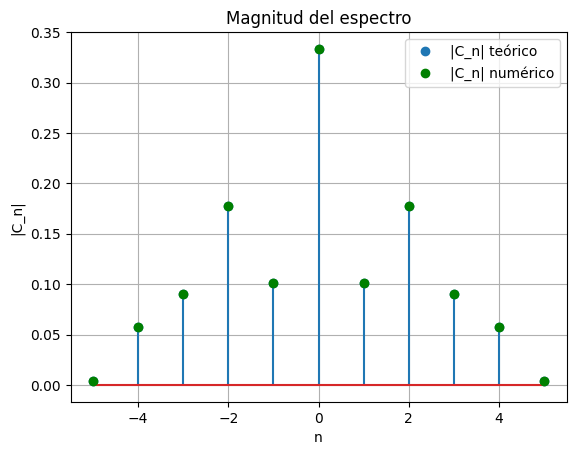

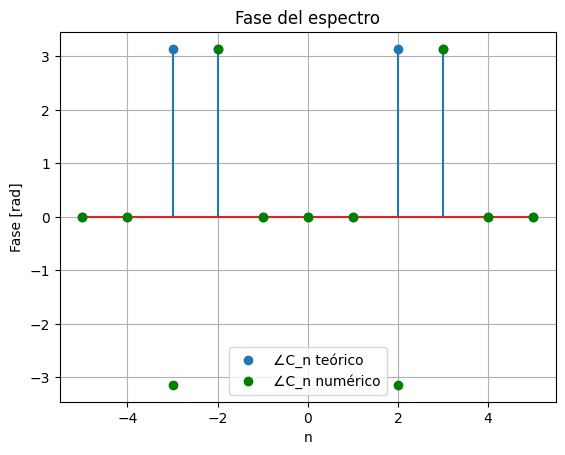

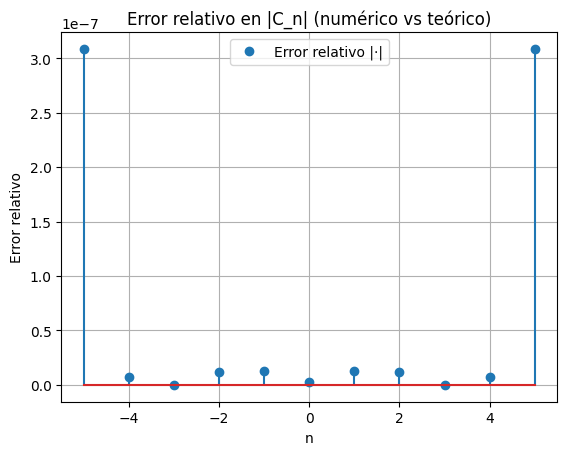

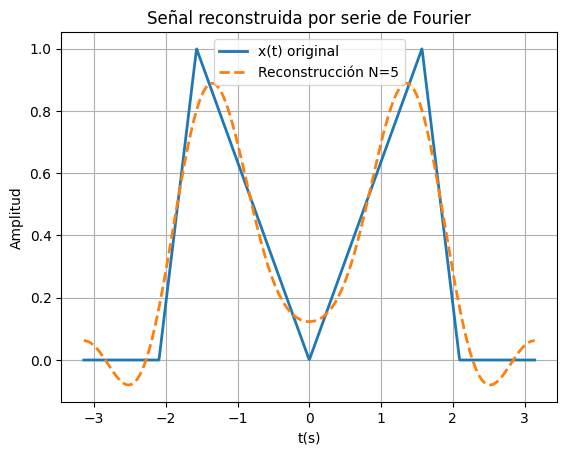

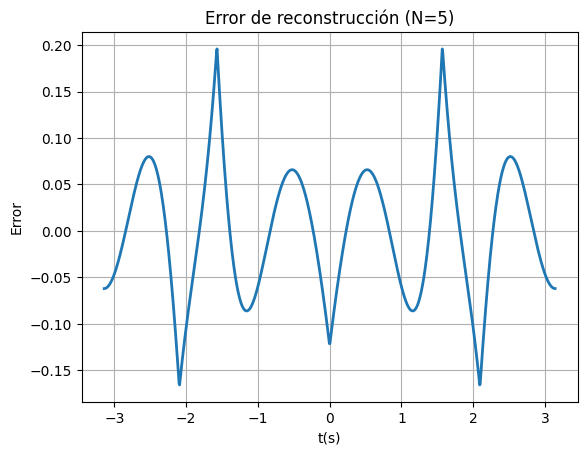

Error relativo (reconstrucción hasta N=5): 2.2266e-02


In [13]:
# Parámetros
t = sp.symbols('t')                # Tiempo [s]
T = 2 * sp.pi                      # Periodo [s]
d1 = T / 4                         # Punto de referencia 1
d2 = T / 3                         # Punto de referencia 2
w0 = 2 * sp.pi / T                 # Frecuencia fundamental [rad/s]
n = sp.symbols('n', integer=True)  # Armónico n-ésimo
A = sp.symbols('A', real=True, positive=True)  # Amplitud

#Parámetros recta 1
m1= (A-0)/(-d1+d2)   #Pendiente
B1=m1*d2            #Corte con el eje y

#Parámetros recta 2
m2= (A-0)/(d1-0)      #Pendiente
B2= 0               #Corte con el eje y

# Amplitud numérica para graficar
A_val = 1

#Definir la señal x(t)
xt= sp.Piecewise(
    (0,(t>=-T/2) & (t<-d2)),
    (m1*t + B1,(t>=-d2) & (t<-d1)),
    (-m2*t + B2,(t>=-d1) & (t<0)),
    (m2*t + B2,(t>=0) & (t<d1)),
    (-m1*t + B1,(t>=d1) & (t<d2)),
    (0,(t>=d2) & (t<=T/2))
)

# Crear función evaluable numéricamente para xt
xt_func = sp.lambdify(t, xt.subs(A, A_val), modules=['numpy'])
# lambdify convierte expresiones simbólicas en funciones numéricas
#modules=['numpy']: le dice a lambdify que use las funciones de numpy para evaluar la expresión
tv = np.linspace(-T/2, T/2, 1000)
xo = xt_func(tv)

#Mostrar señal original
plt.title("Señal original x(t)")
plt.plot(tv, xo, 'b', linewidth=2)
plt.grid()
plt.xlabel("t(s)", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

# Valores numéricos útiles
T_val = float(2*np.pi)
w0_val = float(2*np.pi/T_val)

# Malla para integrar numéricamente Cn
M = 20000
tv_int = np.linspace(-T_val/2, T_val/2, M)
xv_int = xt_func(tv_int)

# Coeficientes teóricos desde x''(t)
# Para n != 0: Cn = -(2A/pi^2) * (3 cos(2πn/3) - 4 cos(πn/2) + 1)/n^2
# C0 = A/3
def Cn_teorico(n_int, A=A_val):
    if n_int == 0:
        return A/3.0
    return -(2*A/np.pi**2) * (3*np.cos(2*np.pi*n_int/3.0)
                              - 4*np.cos(np.pi*n_int/2.0) + 1) / (n_int**2)

# Coeficientes numéricos (integración de x(t))
def Cn_numerico(n_int):
    expo = np.exp(-1j*n_int*w0_val*tv_int)
    integ = np.trapz(xv_int*expo, tv_int)
    return (1.0/T_val)*integ

# Armónicos pedidos
n_vals = list(range(-5, 6))

# Vectores para graficar
C_teo = np.array([Cn_teorico(k) for k in n_vals], dtype=complex)
C_num = np.array([Cn_numerico(k) for k in n_vals], dtype=complex)

Re_teo, Im_teo = C_teo.real, C_teo.imag
Re_num, Im_num = C_num.real, C_num.imag
Mag_teo, Mag_num = np.abs(C_teo), np.abs(C_num)

# Fase cuando |Cn| ~ 0
Phase_teo = np.array([0.0 if Mag_teo[i] < 1e-12 else np.angle(C_teo[i])
                      for i in range(len(n_vals))])
Phase_num = np.array([0.0 if Mag_num[i] < 1e-12 else np.angle(C_num[i])
                      for i in range(len(n_vals))])

# Error relativo en magnitud
eps = 1e-14
RelErr = np.abs(Mag_num - Mag_teo) / np.maximum(Mag_teo, eps)

#Visualización
col_teo = 'tab:blue'    # teórico
col_num = 'tab:orange'  # numérico
# Parte real
plt.figure()
m, s, b = plt.stem(n_vals, Re_teo); m.set_label('Re{C_n} teórico')
plt.plot(n_vals, Re_num, 'o', color='green', label='Re{C_n} numérico')
plt.xlabel('n'); plt.ylabel('Re{C_n}')
plt.title('Parte real de C_n')
plt.grid(True); plt.legend(); plt.show()

# Parte imaginaria
plt.figure()
m, s, b = plt.stem(n_vals, Im_teo); m.set_label('Im{C_n} teórico')
plt.plot(n_vals, Im_num, 'o', color='green', label='Im{C_n} numérico')
plt.xlabel('n'); plt.ylabel('Im{C_n}')
plt.title('Parte imaginaria de C_n')
plt.grid(True); plt.legend(); plt.show()

# Magnitud
plt.figure()
m, s, b = plt.stem(n_vals, Mag_teo); m.set_label('|C_n| teórico')
plt.plot(n_vals, Mag_num, 'o', color='green', label='|C_n| numérico')
plt.xlabel('n'); plt.ylabel('|C_n|')
plt.title('Magnitud del espectro')
plt.grid(True); plt.legend(); plt.show()

# Fase
plt.figure()
m, s, b = plt.stem(n_vals, Phase_teo); m.set_label('∠C_n teórico')
plt.plot(n_vals, Phase_num, 'o', color='green', label='∠C_n numérico')
plt.xlabel('n'); plt.ylabel('Fase [rad]')
plt.title('Fase del espectro')
plt.grid(True); plt.legend(); plt.show()

# Error relativo (magnitud)
plt.figure()
m, s, b = plt.stem(n_vals, RelErr); m.set_label('Error relativo |·|')
plt.xlabel('n'); plt.ylabel('Error relativo')
plt.title('Error relativo en |C_n| (numérico vs teórico)')
plt.grid(True); plt.legend(); plt.show()


# Reconstrucción parcial usando simetría par: x_N(t) = C0 + 2 Σ_{k=1..N} Ck cos(k w0 t)
def x_recon(tv_points, N, A=A_val):
    w0_num = float(sp.N(w0))
    tp = np.asarray(tv_points, dtype=float)  # asegura tipo numérico
    xN = np.full_like(tp, fill_value=Cn_teorico(0, A), dtype=float)
    for k in range(1, N+1):
        Ck = Cn_teorico(k, A)
        xN += 2.0 * Ck * np.cos(k * w0_num * tp)
    return xN

N = 5
tv_plot = np.asarray(tv, dtype=float)      # tv forzado a float para cos()
xo_plot = xt_func(tv_plot)                  # x(t) en esa malla
xN = x_recon(tv_plot, N, A_val)

# Gráfica: original vs reconstruida
plt.figure()
plt.plot(tv_plot, xo_plot, label='x(t) original', linewidth=2)
plt.plot(tv_plot, xN, '--', label=f'Reconstrucción N={N}', linewidth=2)
plt.grid(True)
plt.xlabel('t(s)'); plt.ylabel('Amplitud')
plt.title('Señal reconstruida por serie de Fourier')
plt.legend()
plt.show()

# Gráfica: error temporal
plt.figure()
plt.plot(tv_plot, xo_plot - xN, linewidth=2)
plt.grid(True)
plt.xlabel('t(s)'); plt.ylabel('Error')
plt.title(f'Error de reconstrucción (N={N})')
plt.show()

#Error relativo
# Potencia total de la señal original Px = (1/T) * ∫ |x(t)|^2 dt
Px = (1.0 / T_val) * np.trapz(np.abs(xv_int)**2, tv_int)

# Número de armónicos usados
Nmax = len(n_vals)//2  # hasta ±N
Pn = 1.0                # peso unitario para cada armónico

# Potencia parcial sumada de la reconstrucción
Psum = np.sum(np.abs(C_num)**2 * Pn)

# Error relativo energético
E_rel = 1 - (Psum / Px)

print(f"Error relativo (reconstrucción hasta N={Nmax}): {E_rel:.4e}")


